# Experiment 3 - Model comparison with reduced set of features

The goal of this notebook is to analyse the performance of the three different models trained on the reduced set of features. These are models with still very good performance despite the strong reduction in the number of features.

Conclusions: 

- All models still perform quite well. 
- It must however be noted that the neural network performs worse than the random forest and decision tree models. 
- Since these more standard machine learning approaches do not only perform better but are also more interpretable these approaches are preferred. 
- Since the performance of the decision tree and the random forest model are very similar, we choose the simplest model. Therefore the decision tree is the preferred model for the task.

As a result of this final comparison, we choose to implement the decision tree model into our interactive user interface. This can be used in the `user_interface.py`. This dashboard can also be ran from the `main.py` file.

In [1]:
import pandas as pd
import re

# Load the Excel file
file_path = '../data/luiss_data_anonym.xlsx'
df = pd.read_excel(file_path)

# Immediately select the remaining important columns
categorical_features = ["Tdoc", "Iva"]
numerical_features = ['Ateco', 'Importo', 'Conto', 'ContoStd', 'CoDitta', 'TIva', 'Caus']

df = df[categorical_features + numerical_features + ["IvaM"]]

df = df[~df.IvaM.isna()]
df

,Tdoc,Iva,Ateco,Importo,Conto,ContoStd,CoDitta,TIva,Caus,IvaM
0,TD04,N2.2,476220,3.22,6625510,6625005,533,12,12,374.0
1,TD04,N2.2,476220,6.20,6625510,6625005,533,12,12,374.0
2,TD04,N2.2,476220,21.06,6625510,6625005,533,12,12,374.0
3,TD04,N2.2,476220,9.50,6625510,6625005,533,12,12,374.0
4,TD04,N2.2,476220,11.38,6625510,6625005,533,12,12,374.0
...,...,...,...,...,...,...,...,...,...,...
134432,TD01,N1,563000,-10.00,1840005,1840005,62,11,11,315.0
134433,TD01,N1,563000,120.00,1840005,1840005,62,11,11,315.0
134434,TD01,N1,563000,-150.00,1840005,1840005,62,11,11,315.0
134435,TD01,N1,563000,52.00,1840005,1840005,62,11,11,315.0


Make sure that all these columns do not have any missing values as they come

In [2]:
nans_per_column = df.isnull().sum()

# Calculate percentage of NaNs per column
percentage_nans_per_column = (df.isnull().sum() / len(df)) * 100

# Display as dataframe
nans_df = pd.DataFrame({'Number of NaNs': nans_per_column, 'Percentage of NaNs': percentage_nans_per_column})
nans_df

,Number of NaNs,Percentage of NaNs
Tdoc,0,0.0
Iva,0,0.0
Ateco,0,0.0
Importo,0,0.0
Conto,0,0.0
ContoStd,0,0.0
CoDitta,0,0.0
TIva,0,0.0
Caus,0,0.0
IvaM,0,0.0


In [7]:
df

,Tdoc,Iva,IvaM,Ateco,Importo,Conto,ContoStd,CoDitta,TIva,Caus
0,TD04,N2.2,374.0,476220,3.22,6625510,6625005,533,12,12
1,TD04,N2.2,374.0,476220,6.20,6625510,6625005,533,12,12
2,TD04,N2.2,374.0,476220,21.06,6625510,6625005,533,12,12
3,TD04,N2.2,374.0,476220,9.50,6625510,6625005,533,12,12
4,TD04,N2.2,374.0,476220,11.38,6625510,6625005,533,12,12
...,...,...,...,...,...,...,...,...,...,...
134432,TD01,N1,315.0,563000,-10.00,1840005,1840005,62,11,11
134433,TD01,N1,315.0,563000,120.00,1840005,1840005,62,11,11
134434,TD01,N1,315.0,563000,-150.00,1840005,1840005,62,11,11
134435,TD01,N1,315.0,563000,52.00,1840005,1840005,62,11,11


In [8]:
# We still find all 60 classes occurring in the dataset
category_counts = df['IvaM'].value_counts()
print(df.IvaM.nunique())
category_counts

60


IvaM
374.0    22129
324.0    20895
315.0    16589
312.0    11872
381.0    11061
22.0      7237
302.0     6522
310.0     6160
341.0     4426
326.0     4124
300.0     3771
325.0     3410
308.0     2628
317.0     2572
354.0     1960
377.0     1531
358.0     1104
375.0      844
340.0      626
314.0      616
307.0      576
371.0      544
336.0      439
306.0      425
346.0      365
370.0      230
372.0      192
309.0      189
10.0       175
304.0      152
323.0      144
622.0      106
345.0       68
347.0       67
301.0       65
376.0       29
356.0       23
322.0       20
318.0       11
379.0       11
2.0          8
327.0        5
311.0        5
35.0         5
222.0        4
329.0        3
399.0        3
331.0        3
321.0        3
303.0        3
722.0        3
334.0        2
350.0        2
316.0        2
367.0        2
355.0        1
23.0         1
110.0        1
339.0        1
369.0        1
Name: count, dtype: int64

Feature selection, and missing value removal is complete, now we need to preprocess the features in a correct manner

# Feature selection

In [9]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns

In [10]:
# Split the dataset into features and target variable
X = df.drop('IvaM', axis=1)
y = df[['IvaM']]

In [11]:
# Encode target value
encoder = OneHotEncoder()
# Fit and transform the data, specifying sparse=False
encoded_data = encoder.fit_transform(y[['IvaM']]).toarray()
# Create a DataFrame with the encoded data and column names from the encoder
encoded_df_target = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['IvaM']))
encoded_df_target

,IvaM_2.0,IvaM_10.0,IvaM_22.0,IvaM_23.0,IvaM_35.0,IvaM_110.0,IvaM_222.0,IvaM_300.0,IvaM_301.0,IvaM_302.0,...,IvaM_372.0,IvaM_374.0,IvaM_375.0,IvaM_376.0,IvaM_377.0,IvaM_379.0,IvaM_381.0,IvaM_399.0,IvaM_622.0,IvaM_722.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
encoder = OneHotEncoder(drop="first")  
# If we have categories A, B, C -> the dummies only need B, C. If these are both 0, then A = 1. Therefore we drop first category
categorical_features = ["Tdoc", "Iva"]
# Fit and transform the data, specifying sparse=False
encoded_data = encoder.fit_transform(X[categorical_features]).toarray()
# Create a DataFrame with the encoded data and column names from the encoder
encoded_df_cat = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
encoded_df_cat.columns

Index(['Tdoc_TD02', 'Tdoc_TD03', 'Tdoc_TD04', 'Tdoc_TD05', 'Tdoc_TD06',
       'Tdoc_TD17', 'Tdoc_TD24', 'Tdoc_TD25', 'Tdoc_TD26', 'Tdoc_TD27',
       'Iva_N2', 'Iva_N2.1', 'Iva_N2.2', 'Iva_N3', 'Iva_N3.1', 'Iva_N3.2',
       'Iva_N3.3', 'Iva_N3.4', 'Iva_N3.5', 'Iva_N3.6', 'Iva_N4', 'Iva_N5',
       'Iva_N6', 'Iva_N6.1', 'Iva_N6.2', 'Iva_N6.3', 'Iva_N6.4', 'Iva_N6.5',
       'Iva_N6.6', 'Iva_N6.7', 'Iva_N6.8', 'Iva_N6.9', 'Iva_N7'],
      dtype='object')

In [13]:
# Standardize input features to have a standard deviation of 1
numeric_features = ['Ateco', 'Importo', 'Conto', 'ContoStd', 'CoDitta', 'TIva', 'Caus']
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X[numeric_features])
encoded_df_num = pd.DataFrame(scaled_X, columns=scaler.get_feature_names_out(numeric_features))
encoded_df_num.describe()

,Ateco,Importo,Conto,ContoStd,CoDitta,TIva,Caus
count,1.339660e+05,1.339660e+05,1.339660e+05,1.339660e+05,1.339660e+05,1.339660e+05,1.339660e+05
mean,5.091747e-17,1.272937e-18,-1.366286e-16,3.301150e-16,2.545874e-17,1.188074e-16,-2.715599e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.485388e+00,-2.576964e+01,-3.987008e+00,-3.986924e+00,-4.677504e-01,-9.076865e-01,-2.828095e-01
25%,-2.112066e-01,-4.596324e-02,1.073898e-02,1.082442e-02,-4.409928e-01,-9.076865e-01,-2.828095e-01
50%,3.894542e-03,-4.441511e-02,1.413474e-02,1.422018e-02,-3.819415e-01,-9.076865e-01,-2.828095e-01
75%,4.273472e-02,-3.419863e-02,5.812607e-01,5.813394e-01,-1.812593e-01,1.066752e+00,6.831660e-02
max,2.645399e+00,2.237536e+02,2.929060e+00,2.592410e+00,3.827309e+00,1.350571e+01,1.176082e+01


# Split data

In [22]:
encoded_df_y = encoded_df_target
total_encoded_df_X = pd.concat([encoded_df_cat, encoded_df_num], axis=1)
X_train, X_test, y_train, y_test = train_test_split(total_encoded_df_X, encoded_df_y, test_size=0.2, random_state=42)

# Train and evaluate models

### NN Approach

Epoch 1/25
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8695 - loss: 0.5451 - val_accuracy: 0.9310 - val_loss: 0.2322
Epoch 2/25
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9289 - loss: 0.2320 - val_accuracy: 0.9431 - val_loss: 0.1938
Epoch 3/25
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9369 - loss: 0.1987 - val_accuracy: 0.9421 - val_loss: 0.2024
Epoch 4/25
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9405 - loss: 0.1877 - val_accuracy: 0.9457 - val_loss: 0.1546
Epoch 5/25
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9455 - loss: 0.1654 - val_accuracy: 0.9487 - val_loss: 0.1532
Epoch 6/25
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9473 - loss: 0.1586 - val_accuracy: 0.9520 - val_loss: 0.1462
Epoch 7/25
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9490 - loss: 0.1517 - val_accuracy: 0.9557 - val_loss: 0.1332
Epoch 8/25
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9479 - loss: 0.1517 - 

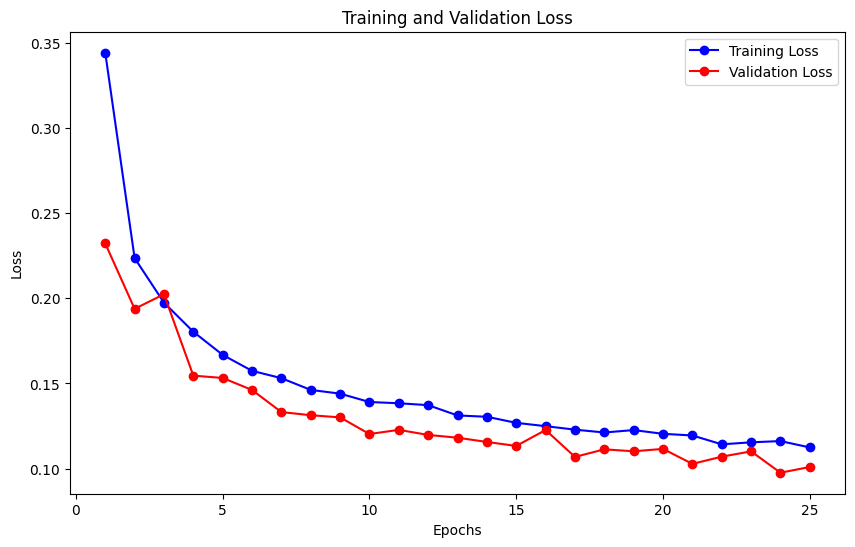

838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9581 - loss: 0.1553
Test Accuracy: 0.9571545720100403
Test Loss: 0.1588340848684311
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [15]:
import keras

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

model = keras.Sequential([
  keras.layers.Dense(units=512, activation="relu"),  
  keras.layers.Dense(units=256, activation="relu"),  
  keras.layers.Dense(units=60, activation="softmax"),  
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# could still implement early stopping and save best model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

y_pred = model.predict(X_test)

In [23]:
# Making predictions on the test set
test_predictions = model.predict(X_test)

y_pred2 = np.argmax(test_predictions, axis=1)
y_test2 = np.argmax(y_test.values, axis=1)

accuracy = accuracy_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2, average='macro')
recall = recall_score(y_test2, y_pred2, average='macro')
f1 = f1_score(y_test2, y_pred2, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.9571545868478017
Precision: 0.7029556932529909
Recall: 0.7066774086745915
F1-Score: 0.700343758039807


c:\Users\20202034\OneDrive - TU Eindhoven\Documents\GitHub\BIP-ML-project-E00659\env_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step


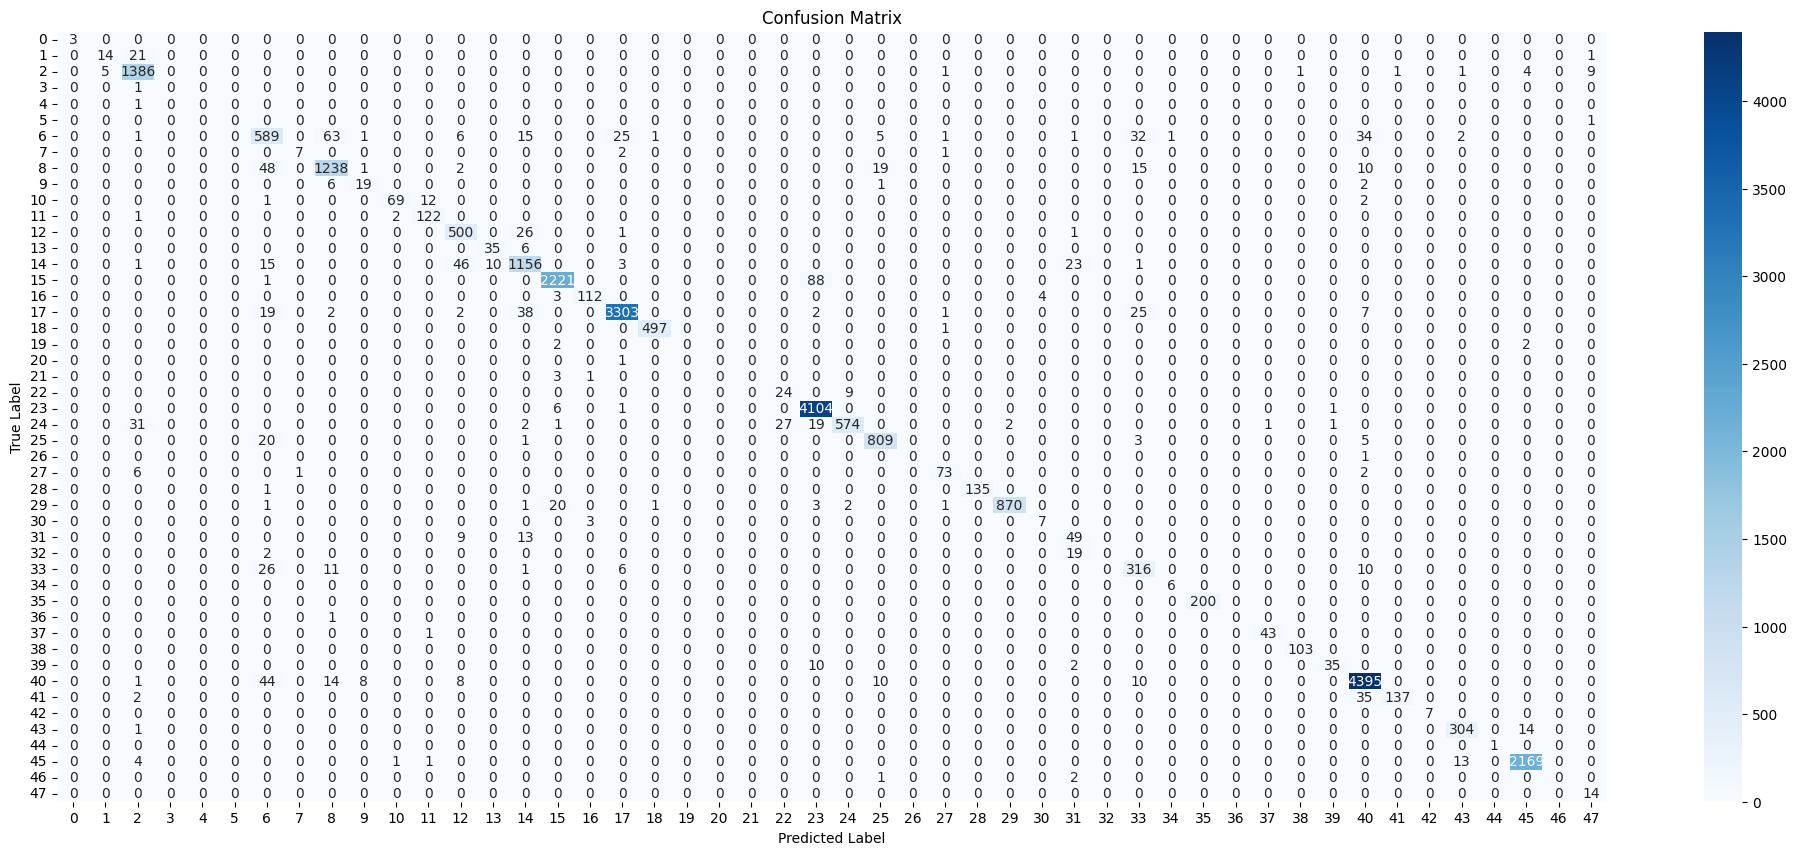

In [24]:
test_predictions = model.predict(X_test)

y_pred2 = np.argmax(test_predictions, axis=1)
y_test2 = np.argmax(y_test.values, axis=1)

conf_matrix = confusion_matrix(y_test2, y_pred2)

# Plotting the confusion matrix
plt.figure(figsize=(25, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### RandomForestClassifier Approach:

In [25]:
def plot_feature_importance(model):
    # importances = self.model.feature_importances_ if 'feature_importances_' in self.model else self.model.coef_[0]
    importances = model.feature_importances_

    # Assuming the model is already trained and feature_importances obtained
    # Create a DataFrame for feature importances
    importances_df = pd.DataFrame(
        {
            "Features": X_train.columns,
            "Importances": importances,
        }
    )

    # Sort the DataFrame by importances
    importances_df = importances_df.sort_values(by="Importances", ascending=False)

    # Create the bar plot
    fig = px.bar(
        importances_df,
        x="Importances",
        y="Features",
        orientation="h",
        title="Feature Importances in Random Forest",
    )
    fig.show()
    return importances_df


def plot_decision_tree(model):
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=X_train.columns,
        class_names=["1", "0"],
        proportion=True,
        filled=True,
        rounded=True,
        special_characters=True,
    )
    modified_dot_data = re.sub(r'<br/>value = \[\[.*?\]\]>', '>', dot_data)
    graph = graphviz.Source(modified_dot_data)
    graph.render(
        "../assets/decision_tree_vis/decision_tree"
    )

In [26]:
model_rf = RandomForestClassifier(verbose=2, n_jobs=-1, random_state=42)
model_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100building tree 21 of 100

building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.9s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100building tree 44 of 100

building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100building tree 70 of 100

building tree 71 of 100
building tree 72

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.1s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

In [27]:
# Making predictions on the test set
test_predictions = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, average='macro')
recall = recall_score(y_test, test_predictions, average='macro')
f1 = f1_score(y_test, test_predictions, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.4s finished
c:\Users\20202034\OneDrive - TU Eindhoven\Documents\GitHub\BIP-ML-project-E00659\env_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\20202034\OneDrive - TU Eindhoven\Documents\GitHub\BIP-ML-project-E00659\env_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9724938419049041
Precision: 0.7113378409091503
Recall: 0.6641317422511166
F1-Score: 0.6788974022475718


c:\Users\20202034\OneDrive - TU Eindhoven\Documents\GitHub\BIP-ML-project-E00659\env_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


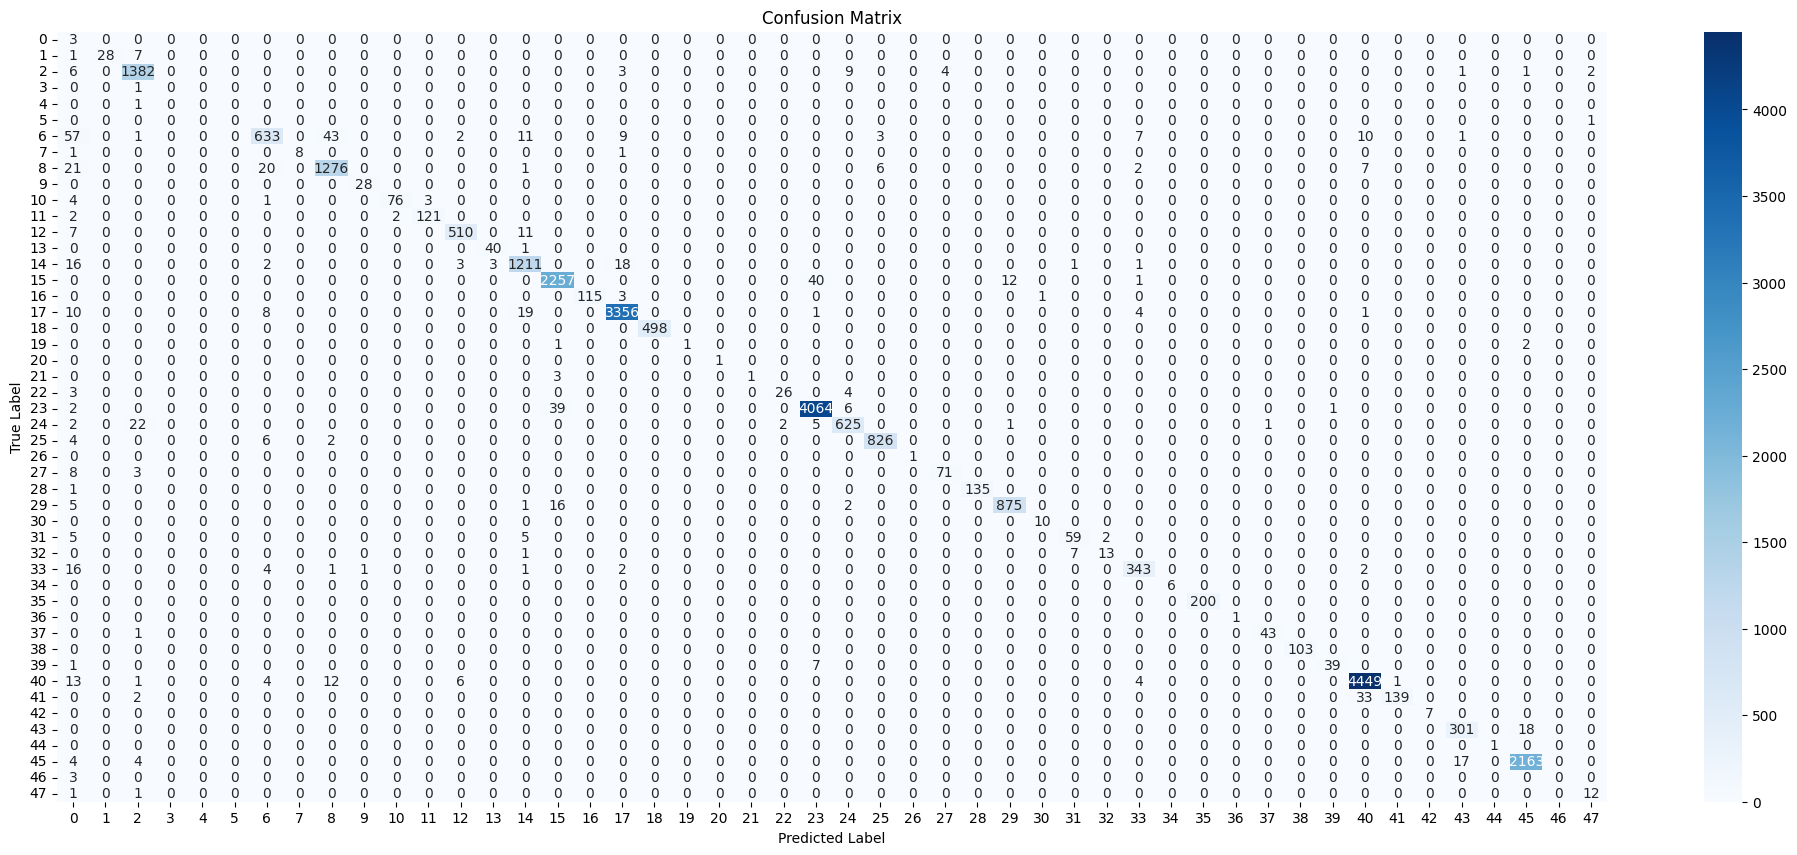

In [28]:
test_predictions = model_rf.predict(X_test)

y_pred2 = np.argmax(test_predictions, axis=1)
y_test2 = np.argmax(y_test.values, axis=1)

conf_matrix = confusion_matrix(y_test2, y_pred2)

# Plotting the confusion matrix
plt.figure(figsize=(25, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### DecisionTreeClassifier Approach:

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Making predictions on the test set
test_predictions = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, average='macro')
recall = recall_score(y_test, test_predictions, average='macro')
f1 = f1_score(y_test, test_predictions, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

c:\Users\20202034\OneDrive - TU Eindhoven\Documents\GitHub\BIP-ML-project-E00659\env_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9721952675972233
Precision: 0.6863792394397584
Recall: 0.668901329844535
F1-Score: 0.6717918850269631


c:\Users\20202034\OneDrive - TU Eindhoven\Documents\GitHub\BIP-ML-project-E00659\env_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\20202034\OneDrive - TU Eindhoven\Documents\GitHub\BIP-ML-project-E00659\env_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


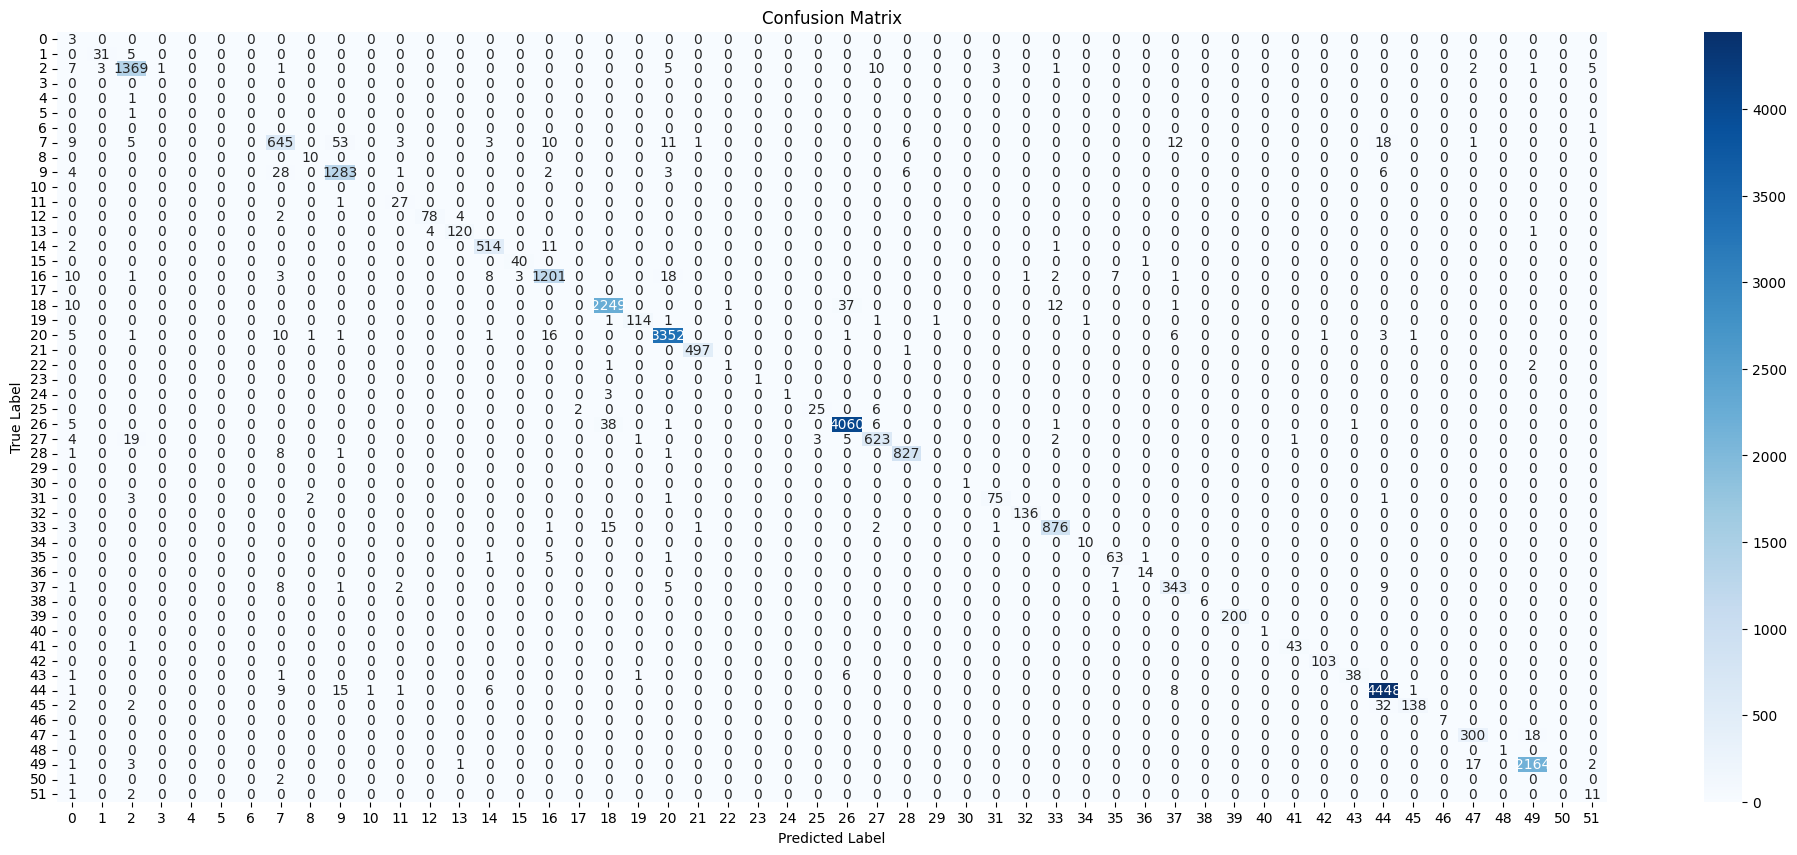

In [30]:
test_predictions = model_dt.predict(X_test)

y_pred2 = np.argmax(test_predictions, axis=1)
y_test2 = np.argmax(y_test.values, axis=1)

conf_matrix = confusion_matrix(y_test2, y_pred2)

# Plotting the confusion matrix
plt.figure(figsize=(25, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()